Определение перспективного тарифа для телеком компании
В ходе данного проекта мне предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В моём распоряжении данные 500 пользователей «Мегалайна» за 2018 год.

Описание тарифов:

Тариф «Смарт»

Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
Тариф «Ультра»

Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

Цель исследования:
Описать поведение клиентов оператора, исходя из выборки. Определить сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитать среднее количество, дисперсию и стандартное отклонение для данных параметров. Построить гистограммы. Описать распределения.

Проверить гипотезы:
средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Написать общий вывод о проведённом анализе

Информация о входных данных
Таблица users (информация о пользователях):
user_id — уникальный идентификатор пользователя
first_name — имя пользователя
last_name — фамилия пользователя
age — возраст пользователя (годы)
reg_date — дата подключения тарифа (день, месяц, год)
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
city — город проживания пользователя
tariff — название тарифного плана
Таблица calls (информация о звонках):
id — уникальный номер звонка
call_date — дата звонка
duration — длительность звонка в минутах
user_id — идентификатор пользователя, сделавшего звонок
Таблица messages (информация о сообщениях):
id — уникальный номер сообщения
message_date — дата сообщения
user_id — идентификатор пользователя, отправившего сообщение
Таблица internet (информация об интернет-сессиях):
id — уникальный номер сессии
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
session_date — дата интернет-сессии
user_id — идентификатор пользователя
Таблица tariffs (информация о тарифах):
tariff_name — название тарифа
rub_monthly_fee — ежемесячная абонентская плата в рублях
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
messages_included — количество сообщений в месяц, включённых в абонентскую плату
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
rub_per_message — стоимость отправки сообщения сверх тарифного пакета
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта

Шаг 1. Изучение входных данных
Импортирую библиотеку Pandas и с помощью метода .read_csv() создаю 5 DataFrame с данными из различных баз данных. Новые датафреймы назову следующими именами:

data_calls - информация о звонках

data_internet - информация об интернет-сессиях

data_messages - информация о сообщениях

data_tariffs - информация о тарифах

data_users - информация о пользователях

In [1]:
import pandas as pd   # Импортирую библиотеку Pandas
import matplotlib.pyplot as plt # Импортирую библиотеку визуализации
import numpy as np    # Импортирую библиотеку для математических вычислений
from scipy import stats as st # Испортирую библиотеку для высокоуровневых математических вычислений

ClrG = '\033[32m'                # Инициализирую переменную для вывода текста зелёным цветом 
ClrDef = '\033[0m'               # Инициализирую переменную для вывода текста с дефолтными настройками

# Создаю функцию для получения основной информации о датафрейме
def datainfo(dataframe):
    display(dataframe.head(10))
    display(dataframe.describe())
    dataframe.info()

# Создаю DataFrame с именем 'data_calls'
data_calls = pd.read_csv('/datasets/calls.csv')
# Создаю DataFrame с именем 'data_internet'
data_internet = pd.read_csv('/datasets/internet.csv')
# Создаю DataFrame с именем 'data_messages'
data_messages = pd.read_csv('/datasets/messages.csv')
# Создаю DataFrame с именем 'data_tariffs'
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
# Создаю DataFrame с именем 'data_users'
data_users = pd.read_csv('/datasets/users.csv')

С помощью функции datainfo() получаю основную информацию о таблицах

In [2]:
# Создаю список с названиями всех датафреймов
dataframe_list = [data_calls, data_internet, data_messages, data_tariffs, data_users]
for x in dataframe_list: # Применяю метод .info() ко всем датафреймам по очереди
    print(datainfo(x))   # Применяю метод .info()
    print('')            # Пустая строка для удобства чтения результатов вывода

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None



,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None



,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None



,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None



Получаю следующую структуру таблиц:

data_calls 

Количество столбцов: 4 

Количество строк: 202607 

Тип данных в столбцах: float64(1), int64(1), object(2) 

data_internet 

Количество столбцов: 5 

Количество строк: 149396 

Тип данных в столбцах: float64(1), int64(2), object(2) 

data_messages 

Количество столбцов: 3 

Количество строк: 123036 

Тип данных в столбцах: int64(1), object(2) 

data_tariffs 

Количество столбцов: 8 

Количество строк: 2 

Тип данных в столбцах: int64(7), object(1) 

data_users 

Количество столбцов: 8 

Количество строк: 500 

Тип данных в столбцах: int64(2), object(6) 

Вывод

Проанализировав полученную информацию о таблицах, можно выделить следующие проблемы:
Столбец 'churn_date' в таблице data_users имеет пропущенные значения
Столбец 'Unnamed:' в таблице data_internet имеет некорректный вид
Для проведения дальнейшего анализа необходимо решить найденные проблемы и более детально изучить столбцы в данных таблицах.

Шаг 2. Подготовка данных

2.1. Предобработка данных

Первым делом необходимо проанализировать все таблицы на наличие пропущенных значений. Для удобства и автоматизации процесса создам цикл, который проверит столбцы всех таблиц на наличие пропущенных значений с помощью метода .isnull().sum().

In [3]:
# Проверяю все датафреймы из списка 'dataframe_list' на количество пропущенных значений
for x in dataframe_list:      # Создаю цикл для проверки 
    print('==============')   # Строка для удобства чтения результатов вывода
    print(ClrG, x.isnull().sum(), ClrDef) # Применяю метод .isnull().sum()
    print('==============')   # Строка для удобства чтения результатов вывода
    print()

 id           0
call_date    0
duration     0
user_id      0
dtype: int64 

 Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64 

 id              0
message_date    0
user_id         0
dtype: int64 

 messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64 

 user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64 



Пропущенные значения выявлены только в таблице data_users в столбце churn_date. Количество пропусков 462.



Избавление от некорректного столбца 'Unnamed:' в таблице 'data_internet'

Данный столбец является некорректным и не несёт в себе никакой смысловой нагрузки, поэтому я принимаю решение удалить его из датафрейма с помощью функции del.

In [4]:
del data_internet['Unnamed: 0'] # Удаляю столбец 
data_internet.columns           # Вывожу список заголовков столбцов таблицы 'data_internet'

Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

Предобработка таблицы 'data_calls'
Столбец call_date имеет тип данных object, необходимо привести его к типу данных datetime с помощью метода .to_datetime()

In [5]:
#Преобразую столбец 'call_date' к типу данных datetime с помощью метода '.to_datetime()'
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_calls['call_date'].head(5)

0   2018-07-25
1   2018-08-17
2   2018-06-11
3   2018-09-21
4   2018-12-15
Name: call_date, dtype: datetime64[ns]

Столбец duration - длительность звонка в минутах - имеет тип данных float64, что противоречит описанию входных данных о столбце, поэтому необходимо преобразовать данный столбец к типу данных int - целое число и круглить в верхнюю сторону.

In [6]:
data_calls['duration'].head(5) # Вывожу 5 строк столбца 'duration'

0     0.00
1     0.00
2     2.85
3    13.80
4     5.18
Name: duration, dtype: float64

Столбец содержит нулевые значения, чтобы определить что делать с нулевыми значениями, необходимо подробнее изучить значения в диапазоне от 0 до 1. Для этого воспользуюсь методом .query().

In [7]:
print('Диапазон от 0 до 1 минуты:', ClrG, data_calls.query('duration > 0 and duration < 1')['duration'].count(), ClrDef)
print('Количество нулевых значений:', ClrG, data_calls.query('duration == 0')['duration'].count(), ClrDef)

Диапазон от 0 до 1 минуты:  8314 
Количество нулевых значений:  39613 


Таким образом известно, что имеется 8314 значений больше нуля и меньше 1, а также имеется 39613 нулевых значений. Исходя из полученной информации я могу сделать вывод о том, что нулевые значения соответствуют тем звонкам, когда абонент не ответил на звонок и соответственно длительность разговара составила 0 минут и 0 секунд, то есть нулевые значения в столбце duration соответствуют исходящим непринятым звонкам. Опираясь на выдвигаемую мной гипотезу, можно сделать заключение о том, что исходящие звонки с длительностью 0 минут не расходуют пакет и за такие звонки не взимается плата, следовательно от нулевых значений можно избавиться путём удаления их из датафрейма, так как подобные записи не содержат в себе полезной смысловой нагрузки для проведения дальнейшего анализа и ответа на поставленные цели проекта.

Для округления значений в столбце duration в большую сторону воспользуюсь библиотекой numpy и встроенным в неё методом .ceil().

In [8]:
import numpy as np     # Импортирую библиотеку 'numpy'

print('Строк до обработки:', ClrG, data_calls['duration'].count(), ClrDef) # Кол-во строк до обработки
data_calls['duration'] = np.ceil(data_calls['duration']) # Округляю значения в большую сторону
data_calls['duration'] = data_calls['duration'].astype('int') # Перевожу в целочисленные значения
data_calls = data_calls[~(data_calls[['duration']]==0).all(axis=1)] # Удаляю значения равные 0
print('Строк после обработки:', ClrG, data_calls['duration'].count(), ClrDef) # Кол-во строк после обработки
print('Количество нулевых значений:', ClrG, data_calls.query('duration == 0')['duration'].count(), ClrDef) # Кол-во нулей

Строк до обработки:  202607 
Строк после обработки:  162994 
Количество нулевых значений:  0 


Для дальнейшего анализа потребуется создать новый столбец call_month в котором будет значение месяца в котором совершался звонок для каждой записи датафрейма data_calls. Для этого воспользуюсь методом .dt.month. Таким образом получу значение месяца в котором совершался звонок в числовом типе, после чего создаю функцию change_call_month, которая заменил числовое значение месяца на текстовое значение для удобства восприятия информации. (Пример: 1 - Январь, 2 - Февраль)

In [9]:
# Создаю функцию 'change_month_name' для изменения числового значения "Месяц" на текстовое название
def change_month_name(row):
    # Создаю словарь 'list_month' в котором каждому числовому значению Месяца соответствует текстовое значение
    list_month = {1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель', 5: 'Май', 6: 'Июнь', 7: 'Июль', 8: 'Август', 9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'}
    month = row['month'] # Переменная 'month' равна значению из столбца 'month'
    if month == 1:              # Если 'call_month' равно 1, то
        month = list_month[1]   # Значение 'call_month' равно 'Январь'
        return month            # Вернуть новое значение переменной 'month'
    elif month == 2:            # Дальше всё аналогично
        month = list_month[2]  
        return month      
    elif month == 3:
        month = list_month[3]
        return month      
    elif month == 4:
        month = list_month[4]
        return month
    elif month == 5:
        month = list_month[5]
        return month  
    elif month == 6:
        month = list_month[6]
        return month
    elif month == 7:
        month = list_month[7]
        return month 
    elif month == 8:
        month = list_month[8]
        return month    
    elif month == 9:
        month = list_month[9]
        return month    
    elif month == 10:
        month = list_month[10]
        return month
    elif month == 11:
        month = list_month[11]
        return month
    elif month == 12:
        month = list_month[12]
        return month    
    else:
        return month

In [10]:
# Создаю столбец Месяц звонка
data_calls['month'] = data_calls['call_date'].dt.month 

# К датафрейму 'data_calls' применяю функцию 'change_month_name' с помощью метода '.apply()'
data_calls['month'] = data_calls.apply(change_month_name, axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
# словарь
d_months = {1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель', 5: 'Май', 6: 'Июнь',
            7: 'Июль', 8: 'Август', 9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'}

In [12]:
# используем его
data_calls['call_date'].dt.month.map(d_months)

2             Июнь
3         Сентябрь
4          Декабрь
7           Август
8         Сентябрь
            ...   
202602     Декабрь
202603     Октябрь
202604      Ноябрь
202605     Октябрь
202606     Декабрь
Name: call_date, Length: 162994, dtype: object

In [13]:
# также есть встроенная функция в метод dt
data_calls['call_date'].dt.month_name()

2              June
3         September
4          December
7            August
8         September
            ...    
202602     December
202603      October
202604     November
202605      October
202606     December
Name: call_date, Length: 162994, dtype: object

Предобработка таблицы 'data_internet'
Столбец session_date имеет тип данных object, необходимо привести его к типу данных datetime с помощью метода .to_datetime()

In [14]:
# Преобразую столбец 'session_date' к типу данных datetime с помощью метода '.to_datetime()'
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_internet['session_date'].head(5)

0   2018-11-25
1   2018-09-07
2   2018-06-25
3   2018-08-22
4   2018-09-24
Name: session_date, dtype: datetime64[ns]

Столбец mb_used - объём потраченного за сессию интернет-трафика (в мегабайтах) - имеет тип данных float64, что противоречит описанию входных данных о столбце, поэтому необходимо преобразовать данный столбец к типу данных int - целое число и круглить в верхнюю сторону.

In [15]:
print('Диапазон от 0 до 1 mb:', ClrG, data_internet.query('mb_used > 0 and mb_used < 1')['mb_used'].count(), ClrDef)
print('Количество нулевых значений:', ClrG, data_internet.query('mb_used == 0')['mb_used'].count(), ClrDef)

Диапазон от 0 до 1 mb:  101 
Количество нулевых значений:  19598 


Таким образом известно, что имеется 101 значение больше нуля и меньше 1 mb, а также имеется 19598 нулевых значений. Исходя из полученной информации я могу сделать вывод о том, что нулевые значения появляются в том случае, когда абонент не использовал интернет трафик, либо размер трафика не превышал нескольких килобайт, следовательно такие значения не несут в себе полезной нагрузки для дальнейшего анализа и от них можно избавиться.

Для округления значений в столбце mb_used в большую сторону воспользуюсь библиотекой numpy и встроенным в неё методом .ceil().

In [16]:
print('Строк до обработки:', ClrG, data_internet['mb_used'].count(), ClrDef) # Кол-во строк до обработки
data_internet['mb_used'] = np.ceil(data_internet['mb_used']) # Округляю значения в большую сторону
data_internet['mb_used'] = data_internet['mb_used'].astype('int') # Перевожу в целочисленные значения
data_internet = data_internet[~(data_internet[['mb_used']]==0).all(axis=1)] # Удаляю значения равные 0
print('Строк после обработки:', ClrG, data_internet['mb_used'].count(), ClrDef) # Кол-во строк после обработки
print('Количество нулевых значений:', ClrG, data_internet.query('mb_used == 0')['mb_used'].count(), ClrDef) # Кол-во нулей

Строк до обработки:  149396 
Строк после обработки:  129798 
Количество нулевых значений:  0 


Для дальнейшего анализа потребуется создать новый столбец month в котором будет значение месяца в котором использовался интернет трафик для каждой записи датафрейма data_internet. Для этого воспользуюсь методом .dt.month. Таким образом получу значение месяца в котором использовался интернет трафик в числовом типе, после чего воспользуюсь созданной выше функцией change_call_month, которая заменит числовое значение месяца на текстовое значение для удобства восприятия информации. (Пример: 1 - Январь, 2 - Февраль)

In [17]:
# Создаю столбец Месяц использования интернет трафика
data_internet['month'] = data_internet['session_date'].dt.month 

# К датафрейму 'data_internet' применяю функцию 'change_month_name' с помощью метода '.apply()'
data_internet['month'] = data_internet.apply(change_month_name, axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Предобработка таблицы 'data_messages'
Столбец message_date имеет тип данных object, необходимо привести его к типу данных datetime с помощью метода .to_datetime().

In [18]:
# Преобразую столбец 'message_date' к типу данных datetime с помощью метода '.to_datetime()'
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_messages['message_date'].head(5)

0   2018-06-27
1   2018-10-08
2   2018-08-04
3   2018-06-16
4   2018-12-05
Name: message_date, dtype: datetime64[ns]

Для дальнейшего анализа потребуется создать новый столбец month в котором будет значение месяца в котором было отправлено смс сообщение для каждой записи датафрейма data_messages. Для этого воспользуюсь методом .dt.month. Таким образом получу значение месяца в котором было отправлено смс сообщение в числовом типе, после чего воспользуюсь созданной выше функцией change_call_month, которая заменит числовое значение месяца на текстовое значение для удобства восприятия информации. (Пример: 1 - Январь, 2 - Февраль)

In [19]:
# Создаю столбец Месяц отправки смс сообщения
data_messages['month'] = data_messages['message_date'].dt.month 

# К датафрейму 'data_messages' применяю функцию 'change_month_name' с помощью метода '.apply()'
data_messages['month'] = data_messages.apply(change_month_name, axis=1)

Предобработка таблицы 'data_users'
Столбец reg_date имеет тип данных object, необходимо привести его к типу данных datetime с помощью метода .to_datetime().

In [20]:
# Преобразую столбец 'reg_date' к типу данных datetime с помощью метода '.to_datetime()'
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
data_users['reg_date'].head(5)

0   2018-05-25
1   2018-11-01
2   2018-06-17
3   2018-08-17
4   2018-05-14
Name: reg_date, dtype: datetime64[ns]

2.2. Расчёт новых значений для каждого пользователя
В данном разделе необходимо расчитать для каждого клиента следующие параметры:

Количество сделанных звонков и израсходованных минут разговора по месяцам
Количество отправленных сообщений по месяцам
Объем израсходованного интернет-трафика по месяцам
Помесячная выручка с каждого пользователя

2.2.1 Количество сделанных звонков и израсходованных минут разговора по месяцам
Для подсчета количество сделанных звонков и израсходованных минут для каждого пользователя по месяцам, я воспользуюсь методом .groupby для группировки таблицы по столбцам user_id и call_month и посчитаю сумму минут разговора с помощью метода .sum(). Далее создам временный датафрейм в котором посчитаю количество звонков по месяцам для каждого пользователя, после чего объединю два временных датафрейма и получу новый датафрейм calls_grouped в котором будет содержаться информация об израсходованных минутах и количестве сделанных звонков для каждого пользователя по месяцам.

In [21]:
# Создаю df 'calls_grouped' в котором для каждого юзера посчитаю длительность звонков по месяцам
calls_grouped = data_calls.groupby(['user_id','month']).agg({'duration':'sum'}).reset_index()
# Переименую заголовки столбцов (для удобства)
calls_grouped.rename(columns={'duration': 'call_duration'}, inplace=True)
calls_grouped.head(5) # Вывод полученного df 

,user_id,month,call_duration
0,1000,Август,408
1,1000,Декабрь,333
2,1000,Июль,340
3,1000,Июнь,172
4,1000,Май,159


In [22]:
# Создаю df 'calls_grouped2' в котором для каждого юзера посчитаю количество звонков по месяцам
calls_grouped2 = data_calls.groupby(['user_id','month']).agg({'duration':'count'}).reset_index()
calls_grouped2.head(5) # Вывод полученного df 

,user_id,month,duration
0,1000,Август,42
1,1000,Декабрь,38
2,1000,Июль,41
3,1000,Июнь,28
4,1000,Май,17


In [23]:
# Объединяю два временных df в один постоянный
calls_grouped = calls_grouped.merge(calls_grouped2, on=['user_id', 'month'], how='left')
# Переименую заголовки столбцов (для удобства)
calls_grouped.rename(columns={'duration': 'call_count'}, inplace=True)
calls_grouped.head(5) # Вывод полученного df 

,user_id,month,call_duration,call_count
0,1000,Август,408,42
1,1000,Декабрь,333,38
2,1000,Июль,340,41
3,1000,Июнь,172,28
4,1000,Май,159,17


2.2.2 Количество отправленных сообщений по месяцам
Для подсчета количества отправленных сообщений для каждого пользователя по месяцам, я воспользуюсь методом .groupby для группировки таблицы по столбцам user_id и month и посчитаю сумму отправленных сообщений с помощью метода .count(). Полученный датафрейм назову messages_grouped

In [24]:
# Создаю df 'messages_grouped' в котором для каждого юзера посчитаю кол-во сообщений по месяцам
messages_grouped = data_messages.groupby(['user_id','month']).agg({'id':'count'}).reset_index()

# Переименую заголовки столбцов (для удобства)
messages_grouped.rename(columns={'id': 'message_count'}, inplace=True)
messages_grouped.head(5) # Вывод полученного df

,user_id,month,message_count
0,1000,Август,81
1,1000,Декабрь,70
2,1000,Июль,75
3,1000,Июнь,60
4,1000,Май,22


2.2.3 Объем израсходованного интернет-трафика по месяцам
Для подсчета общего объёма израсходованного интернет-трафика для каждого пользователя по месяцам, я воспользуюсь методом .groupby для группировки таблицы по столбцам user_id и month и посчитаю сумму израсходанного интернет-трафика в каждому месяце с помощью метода .sum(). Полученный датафрейм назову internet_grouped

In [25]:
# Создаю df 'internet_grouped' в котором для каждого юзера посчитаю объём трафика по месяцам
internet_grouped = data_internet.groupby(['user_id','month']).agg({'mb_used':'sum'}).reset_index()
# Переименую заголовки столбцов (для удобства)
internet_grouped.rename(columns={'mb_used': 'trafic_used'}, inplace=True)
internet_grouped.head(5) # Вывод полученного df

,user_id,month,trafic_used
0,1000,Август,14070
1,1000,Декабрь,9827
2,1000,Июль,14016
3,1000,Июнь,23257
4,1000,Май,2256


2.2.4 Помесячная выручка с каждого пользователя
Для удобства расчёта месячной выручки (ежемесячных расходов на связь) я объединю ранее созданные датафреймы calls_grouped, messages_grouped, internet_grouped и data_users в один df под названием full_user_data. Объединять таблицы буду с помощью метода .merge().

In [26]:
full_user_data = calls_grouped.merge(messages_grouped,  how = 'outer', on = ['user_id', 'month']).merge(internet_grouped,  how = 'outer', on = ['user_id', 'month']).merge(data_users[['user_id', 'tariff']], how = 'left', on = 'user_id')
full_user_data = full_user_data.fillna(0) # заполняю пустые значения на 0
full_user_data.head(5) # вывожу полученный df на экран для визуальной оценки

,user_id,month,call_duration,call_count,message_count,trafic_used,tariff
0,1000,Август,408.0,42.0,81.0,14070.0,ultra
1,1000,Декабрь,333.0,38.0,70.0,9827.0,ultra
2,1000,Июль,340.0,41.0,75.0,14016.0,ultra
3,1000,Июнь,172.0,28.0,60.0,23257.0,ultra
4,1000,Май,159.0,17.0,22.0,2256.0,ultra


Далее создаю функцию set_total_pay, которая на вход принимает строку из full_user_data и расчитывает какую сумму расходует каждый клиент взависимости от используемого тарифного плана. Для удобства, создаю словарь limit в который записываю характеристики каждого тарифа. После чего применяю созданную функцию к датафрейму full_user_data.

In [27]:
# Создаю словарь для тарифных планов по следующему правилу:
# имя тарифа: 'минуты', 'смс', 'гб', 'цена за 1 минуту', 'цена за 1 смс', 'цена за 1 мб', 'цена тарифа'
limit = {'smart':[500, 50, 15000, 3, 3, 0.2, 550], 'ultra':[3000, 1000, 30000, 1, 1, 0.15, 1950]}

# Объявляю функцию 'set_total_pay' которая заполнит ежемесячную плату в столбце 'total_pay'
def set_total_pay(row):
    tarif = row['tariff']           # Название тарифного плана клиента
    duration = row['call_duration'] # Длительность разговоров за месяц
    message = row['message_count']  # Количество отправленных сообщений за месяц
    trafic = row['trafic_used']     # Объём использованного трафика за месяц
    cost = 0                        # Расходы за месяц
    
    if tarif == 'smart':
        if duration <= limit['smart'][0] and message <= limit['smart'][1] and trafic <= limit['smart'][2]:
            cost = limit['smart'][6]
            return cost
        elif duration > limit['smart'][0] and message <= limit['smart'][1] and trafic <= limit['smart'][2]:
            cost = ((duration - limit['smart'][0]) * limit['smart'][3]) + limit['smart'][6]
            return cost
        elif duration > limit['smart'][0] and message > limit['smart'][1] and trafic <= limit['smart'][2]:
            cost = ((duration - limit['smart'][0]) * limit['smart'][3]) + ((message - limit['smart'][1]) * limit['smart'][4]) + limit['smart'][6]
            return cost
        elif duration > limit['smart'][0] and message > limit['smart'][1] and trafic > limit['smart'][2]:
            cost = ((duration - limit['smart'][0]) * limit['smart'][3]) + ((message - limit['smart'][1]) * limit['smart'][4]) + ((trafic - limit['smart'][2]) * limit['smart'][5]) + limit['smart'][6]
            return cost
        elif duration <= limit['smart'][0] and message > limit['smart'][1] and trafic > limit['smart'][2]:
            cost = ((message - limit['smart'][1]) * limit['smart'][4]) + ((trafic - limit['smart'][2]) * limit['smart'][5]) + limit['smart'][6]
            return cost
        elif duration <= limit['smart'][0] and message > limit['smart'][1] and trafic <= limit['smart'][2]:
            cost = ((message - limit['smart'][1]) * limit['smart'][4]) + limit['smart'][6]
            return cost
        elif duration <= limit['smart'][0] and message <= limit['smart'][1] and trafic > limit['smart'][2]:
            cost = ((trafic - limit['smart'][2]) * limit['smart'][5]) + limit['smart'][6]
            return cost
        elif duration > limit['smart'][0] and message <= limit['smart'][1] and trafic > limit['smart'][2]:
            cost = ((duration - limit['smart'][0]) * limit['smart'][3]) + ((trafic - limit['smart'][2]) * limit['smart'][5]) + limit['smart'][6]
            return cost
    else:
        if duration <= limit['ultra'][0] and message <= limit['ultra'][1] and trafic <= limit['ultra'][2]:
            cost = limit['ultra'][6]
            return cost
        elif duration > limit['ultra'][0] and message <= limit['ultra'][1] and trafic <= limit['ultra'][2]:
            cost = ((duration - limit['ultra'][0]) * limit['ultra'][3]) + limit['ultra'][6]
            return cost
        elif duration > limit['ultra'][0] and message > limit['ultra'][1] and trafic <= limit['ultra'][2]:
            cost = ((duration - limit['ultra'][0]) * limit['ultra'][3]) + ((message - limit['ultra'][1]) * limit['ultra'][4]) + limit['ultra'][6]
            return cost
        elif duration > limit['ultra'][0] and message > limit['ultra'][1] and trafic > limit['ultra'][2]:
            cost = ((duration - limit['ultra'][0]) * limit['ultra'][3]) + ((message - limit['ultra'][1]) * limit['ultra'][4]) + ((trafic - limit['ultra'][2]) * limit['ultra'][5]) + limit['ultra'][6]
            return cost
        elif duration <= limit['ultra'][0] and message > limit['ultra'][1] and trafic > limit['ultra'][2]:
            cost = ((message - limit['ultra'][1]) * limit['ultra'][4]) + ((trafic - limit['ultra'][2]) * limit['ultra'][5]) + limit['ultra'][6]
            return cost
        elif duration <= limit['ultra'][0] and message > limit['ultra'][1] and trafic <= limit['ultra'][2]:
            cost = ((message - limit['ultra'][1]) * limit['ultra'][4]) + limit['ultra'][6]
            return cost
        elif duration <= limit['ultra'][0] and message <= limit['ultra'][1] and trafic > limit['ultra'][2]:
            cost = ((trafic - limit['ultra'][2]) * limit['ultra'][5]) + limit['ultra'][6]
            return cost
        elif duration > limit['ultra'][0] and message <= limit['ultra'][1] and trafic > limit['ultra'][2]:
            cost = ((duration - limit['ultra'][0]) * limit['ultra'][3]) + ((trafic - limit['ultra'][2]) * limit['ultra'][5]) + limit['ultra'][6]
            return cost

# К датафрейму 'full_user_data' применяю функцию 'set_total_pay' с помощью метода '.apply()'
full_user_data['total_pay'] = full_user_data.apply(set_total_pay, axis=1)

full_user_data.head(5) # вывожу таблицу на экран

,user_id,month,call_duration,call_count,message_count,trafic_used,tariff,total_pay
0,1000,Август,408.0,42.0,81.0,14070.0,ultra,1950.0
1,1000,Декабрь,333.0,38.0,70.0,9827.0,ultra,1950.0
2,1000,Июль,340.0,41.0,75.0,14016.0,ultra,1950.0
3,1000,Июнь,172.0,28.0,60.0,23257.0,ultra,1950.0
4,1000,Май,159.0,17.0,22.0,2256.0,ultra,1950.0


In [28]:
# добавляем в таблицу сведения о тарифе
# далее можно складывать и вычитать столбцы, все лимиты и исходные данные будут у каждого тарифа свои
full_user_data\
    .merge(data_users[['user_id', 'tariff']], on='user_id', how='left', suffixes=('', 'right'))\
    .merge(data_tariffs.rename(columns={'tariff_name': 'tariff'}), on='tariff', how='left')

,user_id,month,call_duration,call_count,message_count,trafic_used,tariff,total_pay,tariffright,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,Август,408.0,42.0,81.0,14070.0,ultra,1950.0,ultra,1000,30720,3000,1950,150,1,1
1,1000,Декабрь,333.0,38.0,70.0,9827.0,ultra,1950.0,ultra,1000,30720,3000,1950,150,1,1
2,1000,Июль,340.0,41.0,75.0,14016.0,ultra,1950.0,ultra,1000,30720,3000,1950,150,1,1
3,1000,Июнь,172.0,28.0,60.0,23257.0,ultra,1950.0,ultra,1000,30720,3000,1950,150,1,1
4,1000,Май,159.0,17.0,22.0,2256.0,ultra,1950.0,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,Ноябрь,0.0,0.0,20.0,17516.0,smart,1053.2,smart,50,15360,500,550,200,3,3
3210,1489,Октябрь,0.0,0.0,21.0,19588.0,smart,1467.6,smart,50,15360,500,550,200,3,3
3211,1489,Сентябрь,0.0,0.0,32.0,17232.0,smart,996.4,smart,50,15360,500,550,200,3,3
3212,1240,Февраль,0.0,0.0,0.0,961.0,ultra,1950.0,ultra,1000,30720,3000,1950,150,1,1


<hr style="border: 2px solid orange;" />

3.1 Анализ показателя "количество минут в месяц"
Для анализа данного показателя необходимо сформировать 2 новых датафрейма.

Первый - smart_data_calls - он будет содержать информацию о клиентах пользующихся тарифным планом "smart".
Второй - ultra_data_calls - он будет содержать информацию о клиентах пользующихся тарифным планом "ultra".
Для начала расчитаю среднее количество использованных минут для каждого месяца для каждого тарифного плана по отдельности и среднее количество минут для каждого тарифа. Также посчитаю дисперсию и стандартное отклонение для каждого тарифного плана. После чего визуально сравню полученные результаты на столбчатой гистограмме, где тарифному плану smart будет соответствовать фиолетовый цвет, а тарифному плану ultra будет соответствовать синий цвет.



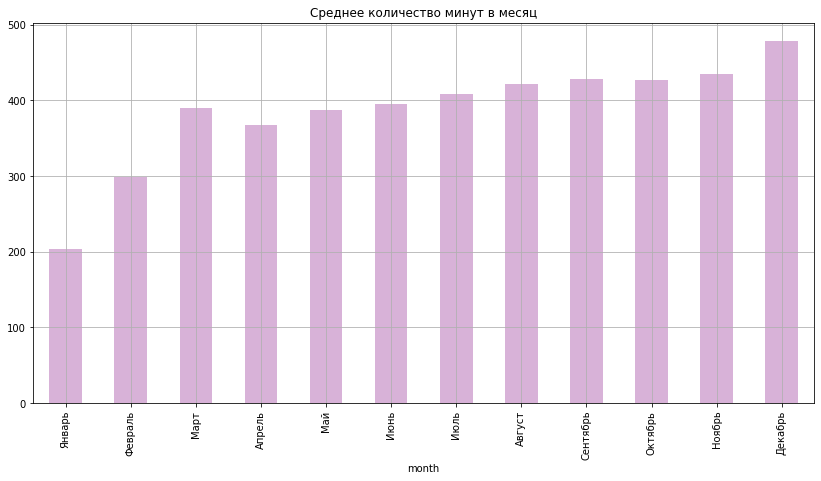

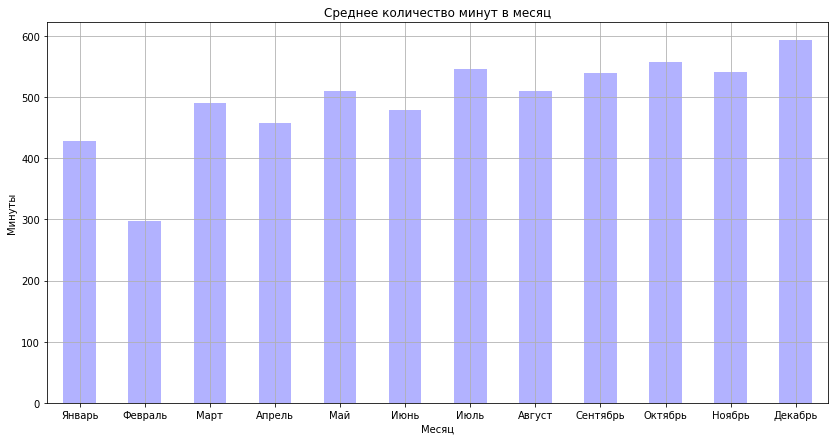

Среднее количество минут для тарифа "smart":  386 минут 
Среднее количество минут для тарифа "ultra":  495 минут 
Разница:  -109 минут 

Дисперсия тарифа "smart":  36219.32 
Дисперсия тарифа "ultra":  100873.63 

Стандартное отклонение для тарифа "smart":  190.31 
Стандартное отклонение для "ultra":  317.61 
Разница:  40.08 %


In [29]:
order_mapping = dict(zip(['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 
                   'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'], [*range(1, 13)]))

# Создаю df в котором будет среднее количество минут для каждого месяца для тарифа "smart"
smart_data_calls = full_user_data.query('tariff == "smart"').groupby(['tariff','month']).agg({'call_duration':'mean'}).reset_index()

# Создаю df в котором будет среднее количество минут для каждого месяца для тарифа "ultra"
ultra_data_calls = full_user_data.query('tariff == "ultra"').groupby(['tariff','month']).agg({'call_duration':'mean'}).reset_index()

# Рисую график для тарифа "smart" - фиолетовый цвет
ax = (
    smart_data_calls.assign(month_order = lambda row: row['month'].map(order_mapping))\
            .sort_values(by='month_order')
            .plot(y='call_duration', x='month', kind='bar', title='Среднее количество минут в месяц', figsize=(14, 7), alpha=0.3, color='purple', grid=True, legend=False)
)
# Рисую график для тарифа "ultra" - синий цвет
(
    ultra_data_calls.assign(month_order = lambda row: row['month'].map(order_mapping))\
            .sort_values(by='month_order')
            .plot(y='call_duration', x='month', kind='bar', title='Среднее количество минут в месяц', figsize=(14, 7), alpha=0.3, color='blue', grid=True, legend=False)
)
plt.xticks(rotation=0)
plt.xlabel('Месяц')
plt.ylabel('Минуты')
plt.show() # рисую гистограмму

smart_mean = int(smart_data_calls['call_duration'].mean()) # расчёт среднего количества минут для "smart"
ultra_mean = int(ultra_data_calls['call_duration'].mean()) # расчёт среднего количества минут для "ultra"

# Подсчёт средних значений для каждого тарифа
print('Среднее количество минут для тарифа "smart":', ClrG, smart_mean, 'минут', ClrDef)
print('Среднее количество минут для тарифа "ultra":', ClrG, ultra_mean, 'минут', ClrDef)
print('Разница:', ClrG, smart_mean - ultra_mean, 'минут', ClrDef)
print()

# Расчёт дисперсии для тарифа "smart"
smart = full_user_data.query('tariff == "smart"')['call_duration'] # df с тарифом "smart"
smart_var = np.var(smart, ddof=1)  # расчёт дисперсии
print('Дисперсия тарифа "smart":', ClrG, '{:.2f}'.format(smart_var), ClrDef)

# Расчёт дисперсии для тарифа "ultra"
ultra = full_user_data.query('tariff == "ultra"')['call_duration'] # df с тарифом "ultra"
ultra_var = np.var(ultra, ddof=1) # расчёт дисперсии
print('Дисперсия тарифа "ultra":', ClrG, '{:.2f}'.format(ultra_var), ClrDef)
print('')

# Расчёт стандартного отклонения для тарифа "smart"
smart_std = np.std(smart, ddof=1) # расчёт стандартного отклонения
print('Стандартное отклонение для тарифа "smart":', ClrG, '{:.2f}'.format(smart_std), ClrDef)

# Расчёт стандартного отклонения для тарифа "ultra"
ultra_std = np.std(ultra, ddof=1) # расчёт стандартного отклонения
print('Стандартное отклонение для "ultra":', ClrG, '{:.2f}'.format(ultra_std), ClrDef)

print('Разница:', ClrG, '{:.2f}'.format(100 - (smart_std / ultra_std * 100)), '%')

Проанализировав полученные результаты, следует отметить следующие важные особенности:

Количество израсходованных минут у тарифа ultra в каждом месяце больше чем у тарифа smart
Среднее количество израсходованных минут у тарифа ultra на 141 минуту больше чем у у тарифа smart
Больше всего минут для обоих тарифов было израсходовано в декабре, а меньше всего в феврале
Данные показатели говорят о том, что пользователи с тарифом ultra расходуют в среднем на 26% минут больше, чем пользователи с тарифом smart.

<a class="anchor" id="31-bullet">

### Способ 1 - ручной

Используем параметр <code>order</code> из функции <code>sns.barplot</code> - ручками задаем нужный порядок

In [30]:
import seaborn as sns

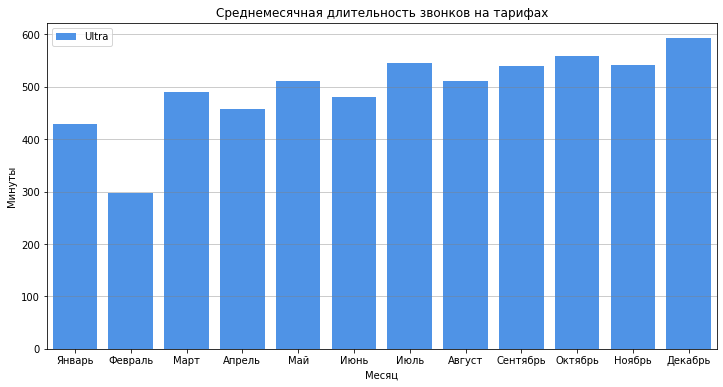

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=ultra_data_calls, x='month', y='call_duration', 
            order=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 
                   'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'], ax=ax, color='#3690FF', label='Ultra')
ax.set_title('Среднемесячная длительность звонков на тарифах')
ax.set_xlabel('Месяц')
ax.set_ylabel('Минуты')
ax.grid(color='grey', alpha=0.5, axis='y')
ax.legend()
plt.show();

### Способ 2 - автоматически и немного ручками

In [32]:
order_mapping = dict(zip(['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 
                   'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'], [*range(1, 13)]))

In [33]:
df_viz = ultra_data_calls.assign(month_order = lambda row: row['month'].map(order_mapping))\
            .sort_values(by='month_order')

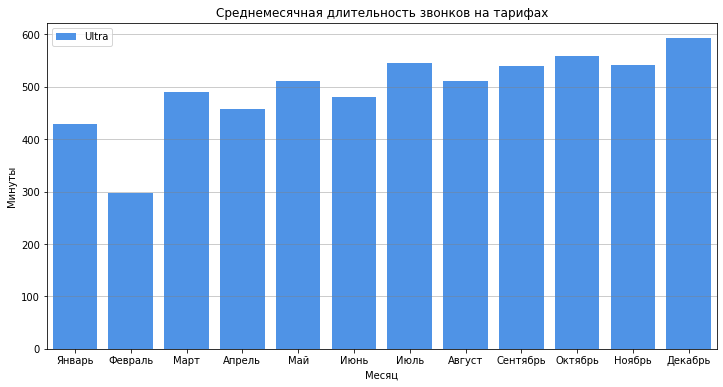

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_viz, x='month', y='call_duration', ax=ax, color='#3690FF', label='Ultra')
ax.set_title('Среднемесячная длительность звонков на тарифах')
ax.set_xlabel('Месяц')
ax.set_ylabel('Минуты')
ax.grid(color='grey', alpha=0.5, axis='y')
ax.legend()
plt.show();

3.2 Анализ показателя "количество сообщений в месяц"
Для анализа данного показателя необходимо сформировать 2 новых датафрейма.

Первый - smart_data_messages - он будет содержать информацию о клиентах пользующихся тарифным планом "smart".
Второй - ultra_data_messages - он будет содержать информацию о клиентах пользующихся тарифным планом "ultra".
Для начала расчитаю среднее количество отправленных сообщений в каждом месяце для каждого тарифного плана и среднее количество отправленных смс для каждого тарифа. Также посчитаю дисперсию и стандартное отклонение для каждого тарифного плана. После чего визуально сравню полученные результаты на столбчатой гистограмме, где тарифному плану smart будет соответствовать фиолетовый цвет, а тарифному плану ultra будет соответствовать синий цвет.

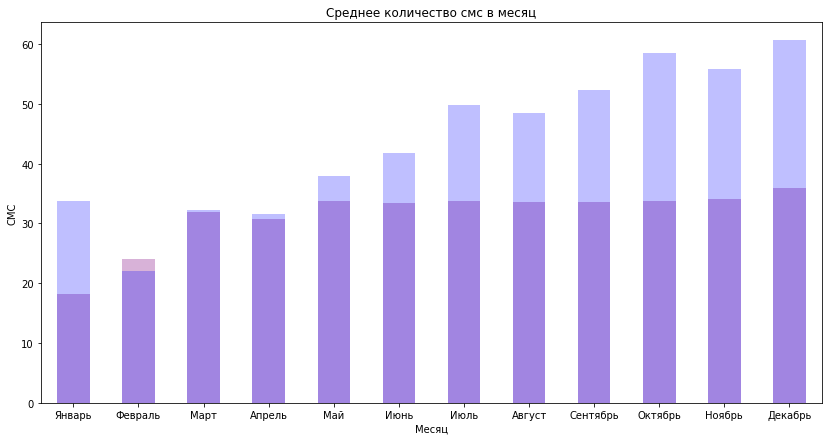

Среднее количество смс для тарифа "smart":  31 смс 
Среднее количество смс для тарифа "ultra":  43 смс 
Разница:  -12 смс 

Дисперсия тарифа "smart":  796.81 
Дисперсия тарифа "ultra":  2285.27 

Стандартное отклонение для тарифа "smart":  28.23 
Стандартное отклонение для "ultra":  47.80 
Разница:  40.95 %


In [35]:
order_mapping = dict(zip(['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 
                   'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'], [*range(1, 13)]))

# Создаю df в котором будет среднее количество смс для каждого месяца для тарифа "smart"
smart_data_messages = full_user_data.query('tariff == "smart"').groupby(['tariff','month']).agg({'message_count':'mean'}).reset_index()

# Создаю df в котором будет среднее количество смс для каждого месяца для тарифа "ultra"
ultra_data_messages = full_user_data.query('tariff == "ultra"').groupby(['tariff','month']).agg({'message_count':'mean'}).reset_index()

# Рисую график для тарифа "smart" - фиолетовый цвет
ax = (
    smart_data_messages.assign(month_order = lambda row: row['month'].map(order_mapping))\
    .sort_values(by='month_order')
    .plot(y='message_count', x='month', kind='bar', title='Среднее количество смс в месяц', figsize=(14, 7), alpha=0.3, color='purple', grid=True, legend=False)
)
# Рисую график для тарифа "ultra" - синий цвет
(
    ultra_data_messages.assign(month_order = lambda row: row['month'].map(order_mapping))\
    .sort_values(by='month_order')
    .plot(y='message_count', x='month', ax=ax, kind='bar', color='blue', alpha=0.25, legend=False)
)
plt.xticks(rotation=0)
plt.xlabel('Месяц')
plt.ylabel('СМС')
plt.show() # рисую гистограмму

smart_mean = int(smart_data_messages['message_count'].mean()) # расчёт среднего количества смс для "smart"
ultra_mean = int(ultra_data_messages['message_count'].mean()) # расчёт среднего количества смс для "ultra"

# Подсчёт средних значений для каждого тарифа
print('Среднее количество смс для тарифа "smart":', ClrG, smart_mean, 'смс', ClrDef)
print('Среднее количество смс для тарифа "ultra":', ClrG, ultra_mean, 'смс', ClrDef)
print('Разница:', ClrG, smart_mean - ultra_mean, 'смс', ClrDef)
print()

# Расчёт дисперсии для тарифа "smart"
smart = full_user_data.query('tariff == "smart"')['message_count'] # df с тарифом "smart"
smart_var = np.var(smart, ddof=1)  # расчёт дисперсии
print('Дисперсия тарифа "smart":', ClrG, '{:.2f}'.format(smart_var), ClrDef)

# Расчёт дисперсии для тарифа "ultra"
ultra = full_user_data.query('tariff == "ultra"')['message_count'] # df с тарифом "ultra"
ultra_var = np.var(ultra, ddof=1) # расчёт дисперсии
print('Дисперсия тарифа "ultra":', ClrG, '{:.2f}'.format(ultra_var), ClrDef)
print('')

# Расчёт стандартного отклонения для тарифа "smart"
smart_std = np.std(smart, ddof=1) # расчёт стандартного отклонения
print('Стандартное отклонение для тарифа "smart":', ClrG, '{:.2f}'.format(smart_std), ClrDef)

# Расчёт стандартного отклонения для тарифа "ultra"
ultra_std = np.std(ultra, ddof=1) # расчёт стандартного отклонения
print('Стандартное отклонение для "ultra":', ClrG, '{:.2f}'.format(ultra_std), ClrDef)

print('Разница:', ClrG, '{:.2f}'.format(100 - (smart_std / ultra_std * 100)), '%')

Проанализировав полученные результаты, следует отметить следующие важные особенности:

Количество отправленных смс для тарифа ultra в каждом месяце больше чем для тарифа smart
Среднее количество отправленных смс в тарифе ultra на 19 смс больше чем в тарифе smart
Стандартное отклонения для тарифа ultra почти на 40% больше чем для тарифа smart
Больше всего минут для обоих тарифов было израсходовано в декабре, а меньше всего в феврале
Данные показатели говорят о том, что пользователи с тарифом ultra расходуют в среднем на 34% больше смс сообщений , чем пользователи с тарифом smart.

3.3 Анализ показателя "объём интернет-трафика в месяц"
Для анализа данного показателя необходимо сформировать 2 новых датафрейма.

Первый - smart_data_internet - он будет содержать информацию о клиентах пользующихся тарифным планом "smart".
Второй - ultra_data_internet - он будет содержать информацию о клиентах пользующихся тарифным планом "ultra".
Для начала расчитаю среднее количество использованного интернет-трафика в каждом месяце для каждого тарифного плана и среднее количество использованного интернет-трафика для каждого тарифа. Также посчитаю дисперсию и стандартное отклонение для каждого тарифного плана. После чего визуально сравню полученные результаты на столбчатой гистограмме, где тарифному плану smart будет соответствовать зелёный цвет, а тарифному плану ultra будет соответствовать оранжевый цвет.

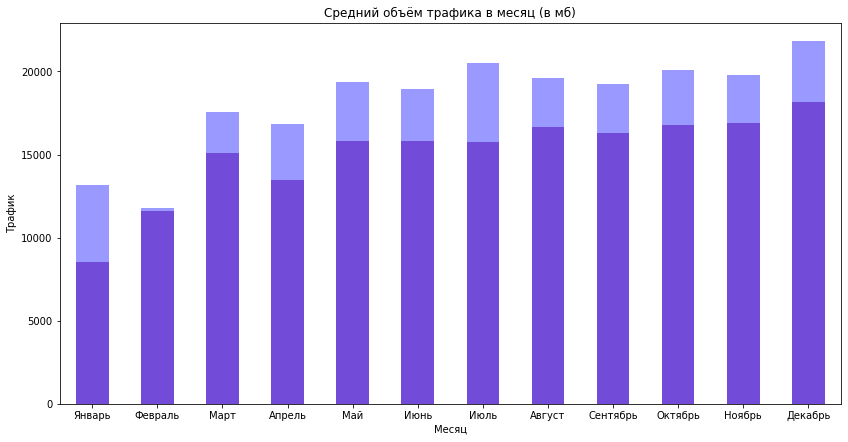

Средний объём трафика для тарифа "smart":  15077 мб 
Средний объём трафика для тарифа "ultra":  18222 мб 
Разница:  -3145 мб 

Дисперсия тарифа "smart":  34545911.13 
Дисперсия тарифа "ultra":  101935621.05 

Стандартное отклонение для тарифа "smart":  5877.58 
Стандартное отклонение для "ultra":  10096.32 
Разница:  41.78 %


In [36]:
order_mapping = dict(zip(['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 
                   'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'], [*range(1, 13)]))

# Создаю df в котором будет средний объём трафика для каждого месяца для тарифа "smart"
smart_data_internet = full_user_data.query('tariff == "smart"').groupby(['tariff','month']).agg({'trafic_used':'mean'}).reset_index()

# Создаю df в котором будет средний объём трафика для каждого месяца для тарифа "ultra"
ultra_data_internet = full_user_data.query('tariff == "ultra"').groupby(['tariff','month']).agg({'trafic_used':'mean'}).reset_index()

# Рисую график для тарифа "smart" 
ax = (
    smart_data_internet.assign(month_order = lambda row: row['month'].map(order_mapping))\
    .sort_values(by='month_order')
    .plot(y='trafic_used', x='month', kind='bar', title='Средний объём трафика в месяц (в мб)', figsize=(14, 7), alpha=0.5, color='purple', grid=True, legend=False)
)
# Рисую график для тарифа "ultra" 
(
    ultra_data_internet.assign(month_order = lambda row: row['month'].map(order_mapping))\
    .sort_values(by='month_order')
    .plot(y='trafic_used', x='month', ax=ax, kind='bar', color='blue', alpha=0.4, legend=False)
)
plt.xticks(rotation=0)
plt.xlabel('Месяц')
plt.ylabel('Трафик')
plt.show() # рисую гистограмму

smart_mean = int(smart_data_internet['trafic_used'].mean()) # расчёт среднего объёма трафика для "smart"
ultra_mean = int(ultra_data_internet['trafic_used'].mean()) # расчёт среднего объёма трафика для "ultra"

# Подсчёт средних значений для каждого тарифа
print('Средний объём трафика для тарифа "smart":', ClrG, smart_mean, 'мб', ClrDef)
print('Средний объём трафика для тарифа "ultra":', ClrG, ultra_mean, 'мб', ClrDef)
print('Разница:', ClrG, smart_mean - ultra_mean, 'мб', ClrDef)
print()

# Расчёт дисперсии для тарифа "smart"
smart = full_user_data.query('tariff == "smart"')['trafic_used'] # df с тарифом "smart"
smart_var = np.var(smart, ddof=1)  # расчёт дисперсии
print('Дисперсия тарифа "smart":', ClrG, '{:.2f}'.format(smart_var), ClrDef)

# Расчёт дисперсии для тарифа "ultra"
ultra = full_user_data.query('tariff == "ultra"')['trafic_used'] # df с тарифом "ultra"
ultra_var = np.var(ultra, ddof=1) # расчёт дисперсии
print('Дисперсия тарифа "ultra":', ClrG, '{:.2f}'.format(ultra_var), ClrDef)
print('')

# Расчёт стандартного отклонения для тарифа "smart"
smart_std = np.std(smart, ddof=1) # расчёт стандартного отклонения
print('Стандартное отклонение для тарифа "smart":', ClrG, '{:.2f}'.format(smart_std), ClrDef)

# Расчёт стандартного отклонения для тарифа "ultra"
ultra_std = np.std(ultra, ddof=1) # расчёт стандартного отклонения
print('Стандартное отклонение для "ultra":', ClrG, '{:.2f}'.format(ultra_std), ClrDef)

print('Разница:', ClrG, '{:.2f}'.format(100 - (smart_std / ultra_std * 100)), '%')

Проанализировав полученные результаты, следует отметить следующие важные особенности:

Объём интернет-трафика для тарифа ultra в каждом месяце больше чем для тарифа smart
Средний объём трафика для тарифа ultra на 3 гб больше чем для тарифа smart
Стандартное отклонения для тарифа ultra почти на 40% больше чем для тарифа smart
Больше всего интернет трафика для обоих тарифов было израсходовано в декабре, а меньше всего в феврале.

3.4 Анализ показателя "Суммарная выручка по тарифному плану в месяц"
Для анализа данного показателя необходимо сформировать 2 новых датафрейма.

Первый - smart_revenue - он будет содержать информацию о клиентах пользующихся тарифным планом "smart". Второй - ultra_revenue - он будет содержать информацию о клиентах пользующихся тарифным планом "ultra". После чего рассчитаю сумарную выручку для каждого тарифного плана в месяц и полученные результаты визуализирую на столбчатой гистограмме, где тарифному плану smart будет соответствовать серый цвет, а тарифному плану ultra будет соответствовать фиолетовый цвет.

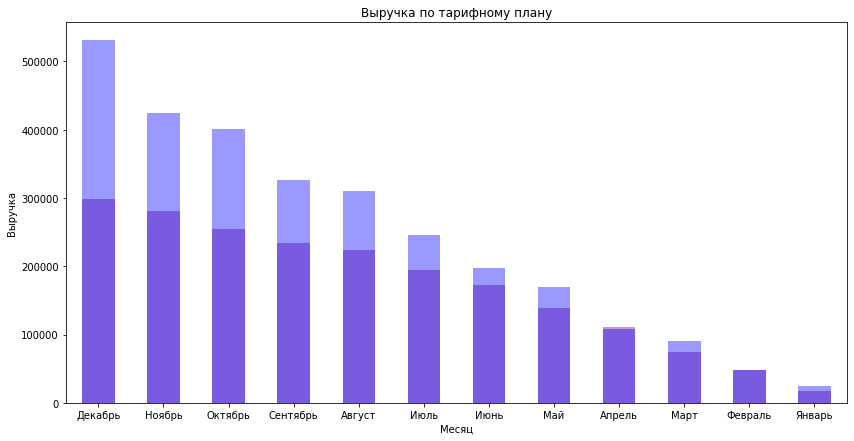

Средний объём ежемесячной выручки для тарифа "smart":  239502.58 рублей 
Средний объём ежемесячной выручки для тарифа "ultra":  170642.90 рублей 
Разница:  40.4 %


In [37]:
# Выручка по тарифному плану "Ultra"
ultra_revenue = full_user_data.query('tariff =="ultra"').groupby(by='month').agg({'total_pay':'sum'}).reset_index()

# Выручка по тарифному плану "Smart"
smart_revenue = full_user_data.query('tariff =="smart"').groupby(by='month').agg({'total_pay':'sum'}).reset_index()

# Рисую график для тарифа "ultra" - фиолетовый цвет
ax = (
    ultra_revenue
    .sort_values(by='total_pay', ascending=False)
    .plot(y='total_pay', x='month', kind='bar', title='Выручка по тарифному плану', figsize=(14, 7), alpha=0.4, color='purple', grid=True, legend=False)
)
# Рисую график для тарифа "smart" - серый цвет
(
    smart_revenue
    .sort_values(by='total_pay', ascending=False)
    .plot(y='total_pay', x='month', ax=ax, kind='bar', color='blue', alpha=0.4, legend=False)
)
plt.xticks(rotation=0)
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show() # рисую гистограмму

# Подсчёт средних значений для каждого тарифа
print('Средний объём ежемесячной выручки для тарифа "smart":', ClrG, '{:.2f}'.format(smart_revenue['total_pay'].mean()), 'рублей', ClrDef)
print('Средний объём ежемесячной выручки для тарифа "ultra":', ClrG, '{:.2f}'.format(ultra_revenue['total_pay'].mean()), 'рублей', ClrDef)
print('Разница:', ClrG, '{:.1f}'.format((smart_revenue['total_pay'].mean() / ultra_revenue['total_pay'].mean() * 100) - 100), '%')

Шаг 4. Проверка гипотез
Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

4.1 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
Для проверки данной гипотезы, необходимо воспользоваться методом проверки гипотезы о равенстве средних двух генеральных совокупностей. Таким образом:

Нулевая гипотеза будет сформулирована следующим образом: средняя выручка пользователей тарифа "Ультра" равна средней выручке пользователей тарифа "Смарт".
Альтернативная гипотеза звучит следующим образом: средняя выручка пользователей тарифа «Ультра» не равна средней выручке пользователей тарифа «Смарт»
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, воспользуюсь методом: scipy.stats.ttest_ind().

In [38]:
# Создаю таблицу для тарифа "smart" где для каждого user_id будет посчитано средняя сумма расходов
array_smart = full_user_data.query('tariff == "smart"').groupby('user_id').agg({'total_pay':'mean'}).reset_index()

# Создаю таблицу для тарифа "ultra" где для каждого user_id будет посчитано средняя сумма расходов
array_ultra = full_user_data.query('tariff == "ultra"').groupby('user_id').agg({'total_pay':'mean'}).reset_index()

# Делаю выборку из 100 строк для проверки гипотезы
array_smart = array_smart['total_pay'].tolist()
array_ultra = array_ultra['total_pay'].tolist()

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу
# Проверка нулевой гипотезы
results = st.ttest_ind(array_smart, array_ultra)

print('p-значение составляет:', ClrG, results.pvalue)

if (results.pvalue < alpha):
    print("Нулевая гипотеза Отвергнута!")
else:
    print("Нулевая гипотеза не отвергнута!")

p-значение составляет:  3.359236593893765e-40
Нулевая гипотеза Отвергнута!


Полученное p-значение крайне маленькое и это в свою очередь говорит о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается и она не равна. Таким образом нулевая гипотеза была отвергнута.

<a class="anchor" id="32-bullet">

4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Для проверки данной гипотезы, необходимо воспользоваться методом гипотезы о равенстве средних двух генеральных совокупностей. Таким образом:

Нулевая гипотеза будет сформулирована следующим образом: средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

Альтернативная гипотеза звучит следующим образом: средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, воспользуюсь методом: scipy.stats.ttest_ind().

In [39]:
data_city = data_users[['user_id', 'city']] # создаю df с user_id и названием города
# Добавляю столбец 'city' в таблицу 'clear_user_data'
full_user_data = full_user_data.merge(data_city, how = 'left', on = 'user_id')

In [40]:
# Создаю таблицу для Москвы где для каждого user_id будет посчитано средняя сумма расходов
array_moskow = full_user_data.query('city == "Москва"').groupby('user_id').agg({'total_pay':'mean'}).reset_index()

# Создаю таблицу для Регионов где для каждого user_id будет посчитано средняя сумма расходов
array_other_city = full_user_data.query('city != "Москва"').groupby('user_id').agg({'total_pay':'mean'}).reset_index()

# Делаю выборку из 80 строк для проверки гипотезы
array_moskow = array_moskow['total_pay'].tolist()
array_other_city = array_other_city['total_pay'].tolist()

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу
# Проверка нулевой гипотезы
results = st.ttest_ind(array_moskow, array_other_city)

print('p-значение составляет:', ClrG, results.pvalue)

if (results.pvalue < alpha):
    print("Нулевая гипотеза Отвергнута!")
else:
    print("Нулевая гипотеза не отвергнута!")

p-значение составляет:  0.3703508161037724
Нулевая гипотеза не отвергнута!


Полученное p-значение довольно большое и это в свою очередь говорит о том, что средняя выручка пользователей из Москвы и пользователей из остальных регионов не различается и она равна. Таким образом нулевая гипотеза не может быть отвергнута.

Шаг 5. Общий вывод
В ходе проведения комплексного анализа мной были проанализированы два тарифных плана телеком компании : Смарт и Ультра. В ходе анализа были выявлены следующие интересные факторы:

Количество израсходованных минут, отправленных смс и объём интернет-трафика у тарифа ultra в каждом месяце больше чем у тарифа smart.
Для тарифа ultra характерны следующие особенности:
Количество израсходованных минут в месяц на 141 минуту или 26% больше чем у тарифа smart.
Количество отправленных смс в месяц на 19 смс или 34% больше чем в тарифе smart.
Объём используемого интернет-трафика в месяц на 18% больше чем для тарифа smart, разница составляет 3.3 гб.
Больше всего минут, смс и интернет трафика было израсходовано в Декабре, наименьшее количество израсходованных минут и смс было в Феврале, а интернет трафика в Январе.
Так же в ходе анализа были проверены следующие гипотезы:

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается:
Данная гипотеза не была отвергнута, так как удалось выяснить, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается и она не равна.
Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Данная гипотеза была отвергнута, так как в ходе анализа удалось выяснить, что средняя выручка пользователей из Москвы и пользователей из остальных регионов не различается и она примерно равна.
Таким образом, резюмируя вышеизложенную информацию, можно сформулировать ответ на поставленный вопрос: "Какой тарифный план лучше для телеком компании?". По-моему мнению, "лучшим" тарифом для телеком компании является тарифный план Смарт, так как пользователи данного тарифного плана расходуют меньше минут, смс и объёма интернет-трафика, но при этом в среднем они тратят на связь на 60 % больше, чем пользователи тарифа Ультра. Таким образом при продвижении тарифного плана Смарт для телеком компании будет снижаться общий объём выделяемых ресурсов (минут, смс, гб), что в свою очередь позволит значителько экономить на операционных издержках. То есть тариф Смарт менее ресурсозатратный для компании, но при этом приносит больше ежемесячной прибыли чем тариф Ультра.